In [1]:
#Import the libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.set_option('display.max_rows', None)

In [2]:
#import data and view
df = pd.read_csv(r'D:\Karan\Porfolio Data Analytics\Python\Project_1_movies\movies.csv')
df.head(100)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


In [3]:
# PART 1: Cleaning the data
# 1. Rearranging the columns
df = df[['name','star','genre','rating','runtime','director','writer','company','score','votes',
         'country','budget','gross','released','year']]

In [4]:
df.head(100)

,name,star,genre,rating,runtime,director,writer,company,score,votes,country,budget,gross,released,year
0,The Shining,Jack Nicholson,Drama,R,146.0,Stanley Kubrick,Stephen King,Warner Bros.,8.4,927000.0,United Kingdom,19000000.0,46998772.0,"June 13, 1980 (United States)",1980
1,The Blue Lagoon,Brooke Shields,Adventure,R,104.0,Randal Kleiser,Henry De Vere Stacpoole,Columbia Pictures,5.8,65000.0,United States,4500000.0,58853106.0,"July 2, 1980 (United States)",1980
2,Star Wars: Episode V - The Empire Strikes Back,Mark Hamill,Action,PG,124.0,Irvin Kershner,Leigh Brackett,Lucasfilm,8.7,1200000.0,United States,18000000.0,538375067.0,"June 20, 1980 (United States)",1980
3,Airplane!,Robert Hays,Comedy,PG,88.0,Jim Abrahams,Jim Abrahams,Paramount Pictures,7.7,221000.0,United States,3500000.0,83453539.0,"July 2, 1980 (United States)",1980
4,Caddyshack,Chevy Chase,Comedy,R,98.0,Harold Ramis,Brian Doyle-Murray,Orion Pictures,7.3,108000.0,United States,6000000.0,39846344.0,"July 25, 1980 (United States)",1980
5,Friday the 13th,Betsy Palmer,Horror,R,95.0,Sean S. Cunningham,Victor Miller,Paramount Pictures,6.4,123000.0,United States,550000.0,39754601.0,"May 9, 1980 (United States)",1980
6,The Blues Brothers,John Belushi,Action,R,133.0,John Landis,Dan Aykroyd,Universal Pictures,7.9,188000.0,United States,27000000.0,115229890.0,"June 20, 1980 (United States)",1980
7,Raging Bull,Robert De Niro,Biography,R,129.0,Martin Scorsese,Jake LaMotta,Chartoff-Winkler Productions,8.2,330000.0,United States,18000000.0,23402427.0,"December 19, 1980 (United States)",1980
8,Superman II,Gene Hackman,Action,PG,127.0,Richard Lester,Jerry Siegel,Dovemead Films,6.8,101000.0,United States,54000000.0,108185706.0,"June 19, 1981 (United States)",1980
9,The Long Riders,David Carradine,Biography,R,100.0,Walter Hill,Bill Bryden,United Artists,7.0,10000.0,United States,10000000.0,15795189.0,"May 16, 1980 (United States)",1980


In [5]:
# 2. Checking for missing data
for col in df.columns:
    data_missing_percentage = np.mean(df[col].isnull())
    print(f'{col} --> {data_missing_percentage*100}%')

name --> 0.0%
star --> 0.013041210224308816%
genre --> 0.0%
rating --> 1.004173187271779%
runtime --> 0.05216484089723526%
director --> 0.0%
writer --> 0.03912363067292645%
company --> 0.2217005738132499%
score --> 0.03912363067292645%
votes --> 0.03912363067292645%
country --> 0.03912363067292645%
budget --> 28.31246739697444%
gross --> 2.464788732394366%
released --> 0.02608242044861763%
year --> 0.0%


In [6]:
# Drop the missing values and check again
df = df.dropna()

for col in df.columns:
    dmp = np.mean(df[col].isnull())
    print(f'{col} --> {dmp*100}%')

name --> 0.0%
star --> 0.0%
genre --> 0.0%
rating --> 0.0%
runtime --> 0.0%
director --> 0.0%
writer --> 0.0%
company --> 0.0%
score --> 0.0%
votes --> 0.0%
country --> 0.0%
budget --> 0.0%
gross --> 0.0%
released --> 0.0%
year --> 0.0%


In [7]:
# 3. Changing the data types of columns to get rid of decimal
df['votes'] = df['votes'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['budget'] = df['budget'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')

In [8]:
df.head(100)

,name,star,genre,rating,runtime,director,writer,company,score,votes,country,budget,gross,released,year
0,The Shining,Jack Nicholson,Drama,R,146,Stanley Kubrick,Stephen King,Warner Bros.,8.4,927000,United Kingdom,19000000,46998772,"June 13, 1980 (United States)",1980
1,The Blue Lagoon,Brooke Shields,Adventure,R,104,Randal Kleiser,Henry De Vere Stacpoole,Columbia Pictures,5.8,65000,United States,4500000,58853106,"July 2, 1980 (United States)",1980
2,Star Wars: Episode V - The Empire Strikes Back,Mark Hamill,Action,PG,124,Irvin Kershner,Leigh Brackett,Lucasfilm,8.7,1200000,United States,18000000,538375067,"June 20, 1980 (United States)",1980
3,Airplane!,Robert Hays,Comedy,PG,88,Jim Abrahams,Jim Abrahams,Paramount Pictures,7.7,221000,United States,3500000,83453539,"July 2, 1980 (United States)",1980
4,Caddyshack,Chevy Chase,Comedy,R,98,Harold Ramis,Brian Doyle-Murray,Orion Pictures,7.3,108000,United States,6000000,39846344,"July 25, 1980 (United States)",1980
5,Friday the 13th,Betsy Palmer,Horror,R,95,Sean S. Cunningham,Victor Miller,Paramount Pictures,6.4,123000,United States,550000,39754601,"May 9, 1980 (United States)",1980
6,The Blues Brothers,John Belushi,Action,R,133,John Landis,Dan Aykroyd,Universal Pictures,7.9,188000,United States,27000000,115229890,"June 20, 1980 (United States)",1980
7,Raging Bull,Robert De Niro,Biography,R,129,Martin Scorsese,Jake LaMotta,Chartoff-Winkler Productions,8.2,330000,United States,18000000,23402427,"December 19, 1980 (United States)",1980
8,Superman II,Gene Hackman,Action,PG,127,Richard Lester,Jerry Siegel,Dovemead Films,6.8,101000,United States,54000000,108185706,"June 19, 1981 (United States)",1980
9,The Long Riders,David Carradine,Biography,R,100,Walter Hill,Bill Bryden,United Artists,7.0,10000,United States,10000000,15795189,"May 16, 1980 (United States)",1980


In [9]:
# 4. Inconsistency in the Year coloumn and release coloumn
#Creating a new column for the Correct year of release and deleting the wrong one
df['YearOfRelease'] = df['released'].astype(str).str.extract(pat = '([0-9]{4})').astype(int)
df = df.drop(['year'], axis = 1)

In [10]:
df.head(100)

,name,star,genre,rating,runtime,director,writer,company,score,votes,country,budget,gross,released,YearOfRelease
0,The Shining,Jack Nicholson,Drama,R,146,Stanley Kubrick,Stephen King,Warner Bros.,8.4,927000,United Kingdom,19000000,46998772,"June 13, 1980 (United States)",1980
1,The Blue Lagoon,Brooke Shields,Adventure,R,104,Randal Kleiser,Henry De Vere Stacpoole,Columbia Pictures,5.8,65000,United States,4500000,58853106,"July 2, 1980 (United States)",1980
2,Star Wars: Episode V - The Empire Strikes Back,Mark Hamill,Action,PG,124,Irvin Kershner,Leigh Brackett,Lucasfilm,8.7,1200000,United States,18000000,538375067,"June 20, 1980 (United States)",1980
3,Airplane!,Robert Hays,Comedy,PG,88,Jim Abrahams,Jim Abrahams,Paramount Pictures,7.7,221000,United States,3500000,83453539,"July 2, 1980 (United States)",1980
4,Caddyshack,Chevy Chase,Comedy,R,98,Harold Ramis,Brian Doyle-Murray,Orion Pictures,7.3,108000,United States,6000000,39846344,"July 25, 1980 (United States)",1980
5,Friday the 13th,Betsy Palmer,Horror,R,95,Sean S. Cunningham,Victor Miller,Paramount Pictures,6.4,123000,United States,550000,39754601,"May 9, 1980 (United States)",1980
6,The Blues Brothers,John Belushi,Action,R,133,John Landis,Dan Aykroyd,Universal Pictures,7.9,188000,United States,27000000,115229890,"June 20, 1980 (United States)",1980
7,Raging Bull,Robert De Niro,Biography,R,129,Martin Scorsese,Jake LaMotta,Chartoff-Winkler Productions,8.2,330000,United States,18000000,23402427,"December 19, 1980 (United States)",1980
8,Superman II,Gene Hackman,Action,PG,127,Richard Lester,Jerry Siegel,Dovemead Films,6.8,101000,United States,54000000,108185706,"June 19, 1981 (United States)",1981
9,The Long Riders,David Carradine,Biography,R,100,Walter Hill,Bill Bryden,United Artists,7.0,10000,United States,10000000,15795189,"May 16, 1980 (United States)",1980


In [11]:
# 5. Sort the data in the descending order of gross
df = df.sort_values(by=['gross'], inplace = False, ascending = False)
df.head(100)

,name,star,genre,rating,runtime,director,writer,company,score,votes,country,budget,gross,released,YearOfRelease
5445,Avatar,Sam Worthington,Action,PG-13,162,James Cameron,James Cameron,Twentieth Century Fox,7.8,1100000,United States,237000000,2847246203,"December 18, 2009 (United States)",2009
7445,Avengers: Endgame,Robert Downey Jr.,Action,PG-13,181,Anthony Russo,Christopher Markus,Marvel Studios,8.4,903000,United States,356000000,2797501328,"April 26, 2019 (United States)",2019
3045,Titanic,Leonardo DiCaprio,Drama,PG-13,194,James Cameron,James Cameron,Twentieth Century Fox,7.8,1100000,United States,200000000,2201647264,"December 19, 1997 (United States)",1997
6663,Star Wars: Episode VII - The Force Awakens,Daisy Ridley,Action,PG-13,138,J.J. Abrams,Lawrence Kasdan,Lucasfilm,7.8,876000,United States,245000000,2069521700,"December 18, 2015 (United States)",2015
7244,Avengers: Infinity War,Robert Downey Jr.,Action,PG-13,149,Anthony Russo,Christopher Markus,Marvel Studios,8.4,897000,United States,321000000,2048359754,"April 27, 2018 (United States)",2018
7480,The Lion King,Donald Glover,Animation,PG,118,Jon Favreau,Jeff Nathanson,Walt Disney Pictures,6.9,222000,United States,260000000,1670727580,"July 19, 2019 (United States)",2019
6653,Jurassic World,Chris Pratt,Action,PG-13,124,Colin Trevorrow,Rick Jaffa,Universal Pictures,7.0,593000,United States,150000000,1670516444,"June 12, 2015 (United States)",2015
6043,The Avengers,Robert Downey Jr.,Action,PG-13,143,Joss Whedon,Joss Whedon,Marvel Studios,8.0,1300000,United States,220000000,1518815515,"May 4, 2012 (United States)",2012
6646,Furious 7,Vin Diesel,Action,PG-13,137,James Wan,Chris Morgan,Universal Pictures,7.1,370000,United States,190000000,1515341399,"April 3, 2015 (United States)",2015
7494,Frozen II,Kristen Bell,Animation,PG,103,Chris Buck,Jennifer Lee,Walt Disney Animation Studios,6.8,148000,United States,150000000,1450026933,"November 22, 2019 (United States)",2019


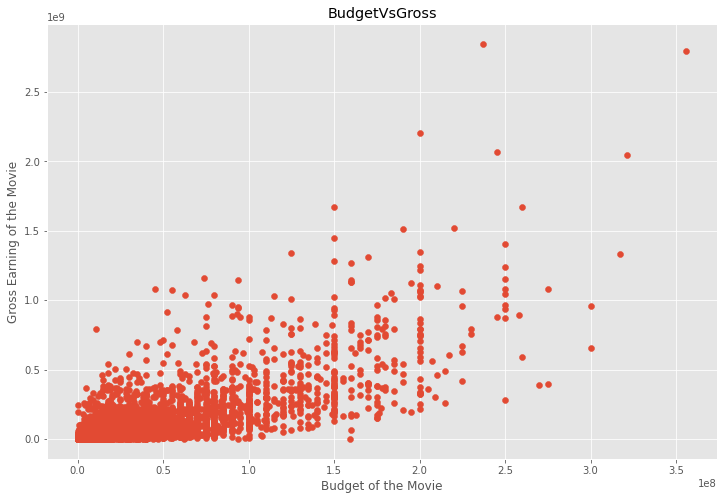

In [12]:
# Part 2: Data Correlation
# 1. Gross Vs Budget

# i. Scatter Plot(Matplotlib)

plt.scatter(x = df['budget'], y = df['gross'])
plt.title('BudgetVsGross')
plt.xlabel('Budget of the Movie')
plt.ylabel('Gross Earning of the Movie')

plt.show()

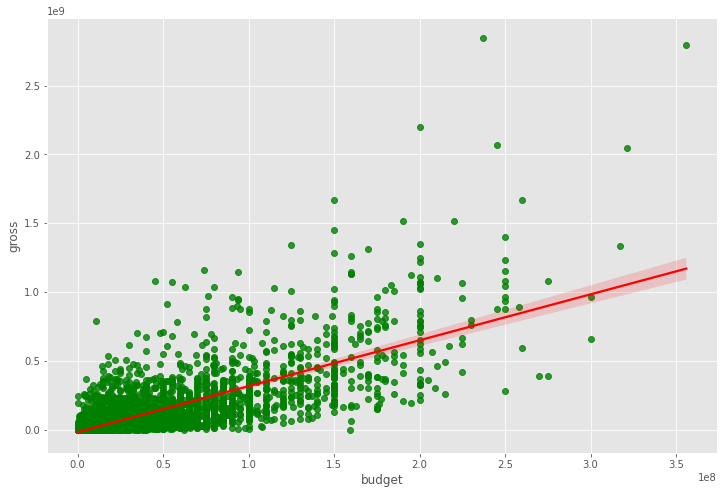

In [13]:
# ii. ScatterPlot(SeaBorn)

sns.regplot(x = df['budget'], y = df['gross'], scatter_kws = {'color' : 'green'}, line_kws = {'color': 'red'})
plt.show()

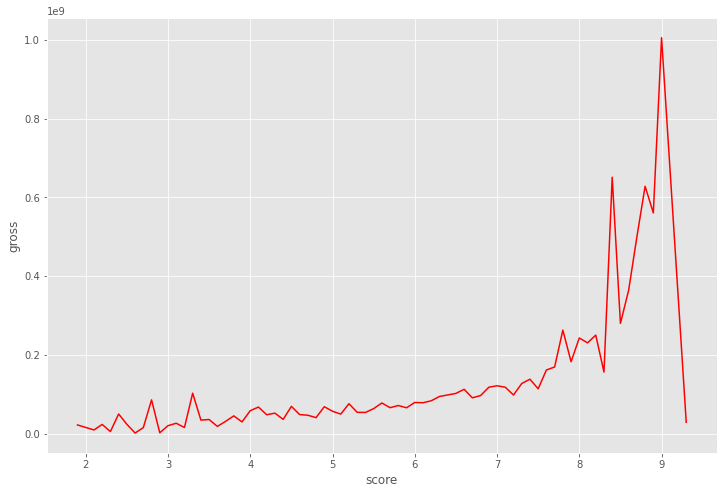

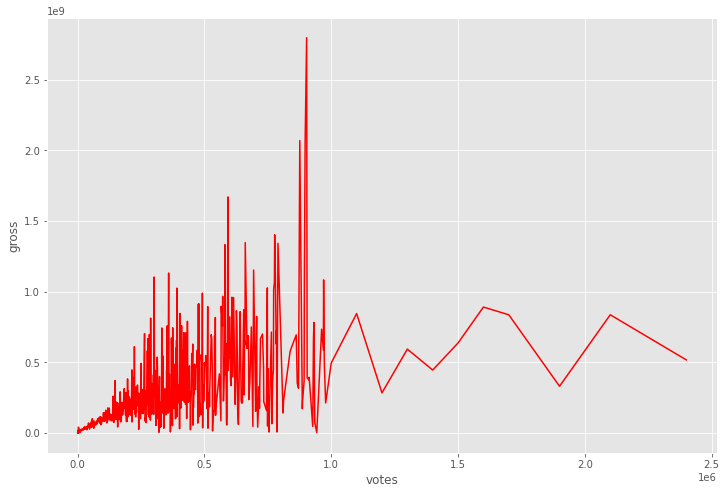

In [14]:
# 2. Score Vs Gross and Votes Vs Gross

#LinePlot(SeaBorn)
sns.lineplot(x = df['score'], y = df['gross'],color = 'red', errorbar = None)
plt.show()

sns.lineplot(x = df['votes'], y = df['gross'],color = 'red', errorbar = None)
plt.show()

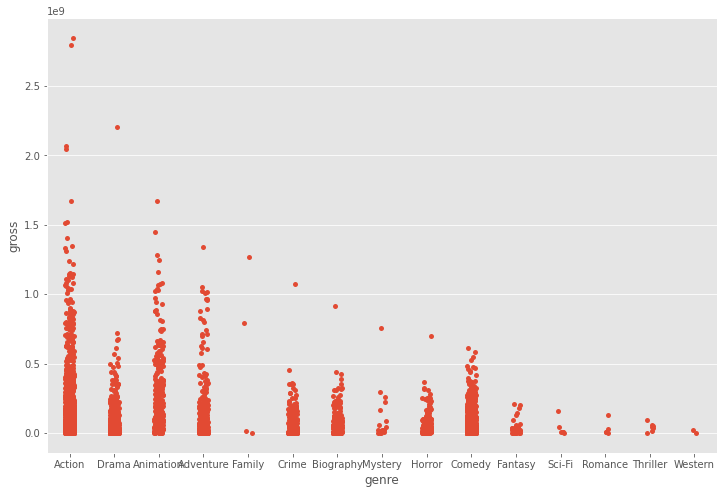

In [15]:
# 3. Genres Vs Gross
sns.stripplot(x = 'genre', y = 'gross', data = df)
plt.show()

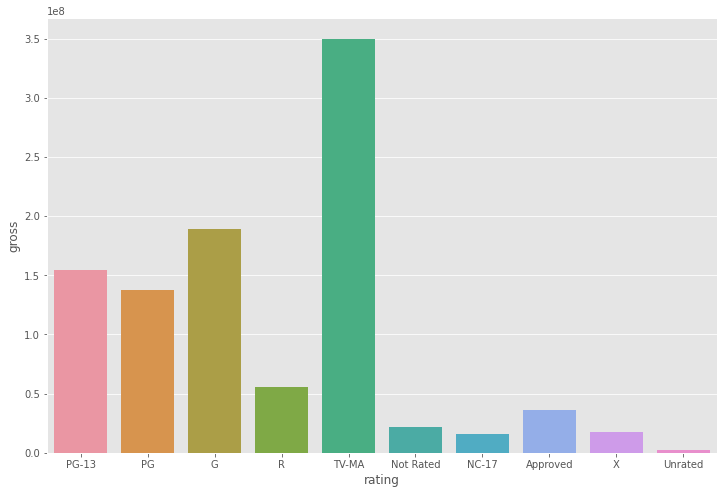

In [16]:
# 4. Ratings vs Gross
sns.barplot(x = 'rating', y = 'gross', errorbar = None, data = df)
plt.show()

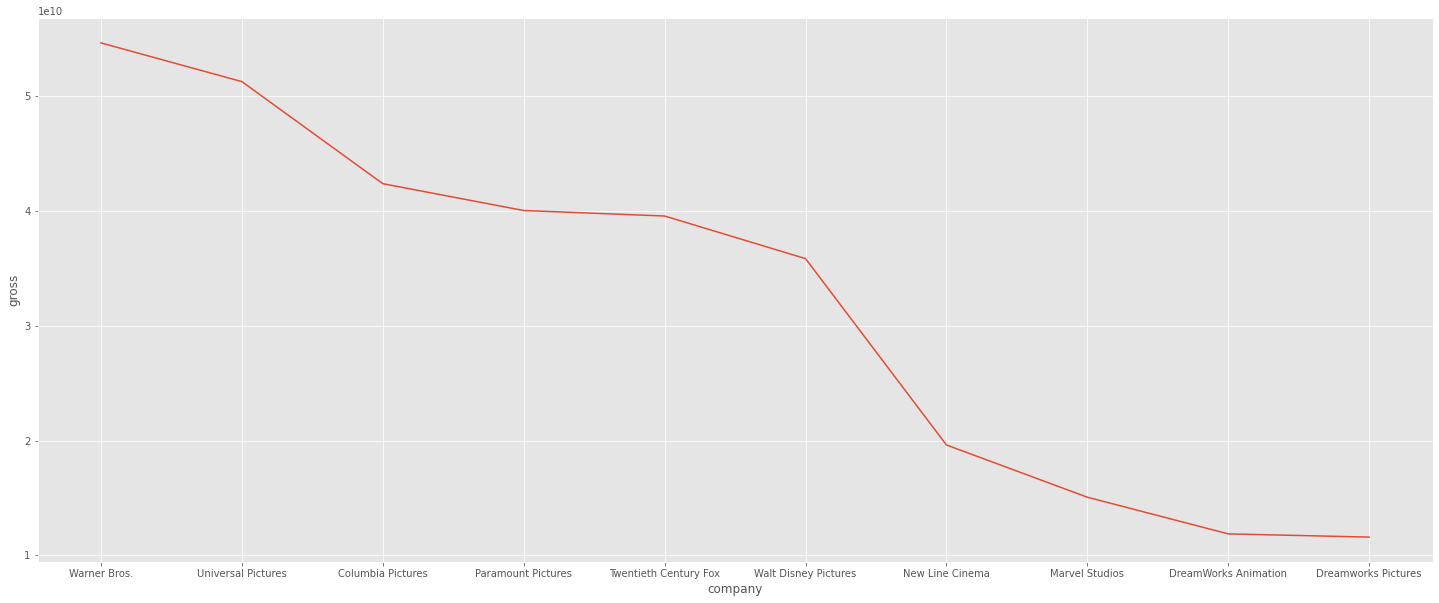

In [17]:
# 6. Companies Vs Gross
#Top 5 companies by Gross Revenues
Gross_Sum_Of_Company = df.groupby('company')[['gross']].sum()
GSC_Sorted = Gross_Sum_Of_Company.sort_values('gross', ascending = False)[:10]
GSC_Sorted = GSC_Sorted['gross'].astype('int64')
fig, ax = plt.subplots(figsize=(25, 10))
sns.lineplot(data = GSC_Sorted, ax = ax)
plt.show()

In [18]:
# 5. Overall Correlation

#Assigning an random numeric value to each non-numeric unique categorical value
df_all_numeric = df
for col in df_all_numeric.columns:
    if df_all_numeric[col].dtype == 'object':
        df_all_numeric[col] = df_all_numeric[col].astype('category')
        df_all_numeric[col] = df_all_numeric[col].cat.codes
df_all_numeric.head(10)

,name,star,genre,rating,runtime,director,writer,company,score,votes,country,budget,gross,released,YearOfRelease
5445,386,1534,0,5,162,785,1263,1382,7.8,1100000,47,237000000,2847246203,527,2009
7445,388,1470,0,5,181,105,513,983,8.4,903000,47,356000000,2797501328,137,2019
3045,4909,1073,6,5,194,785,1263,1382,7.8,1100000,47,200000000,2201647264,534,1997
6663,3643,356,0,5,138,768,1806,945,7.8,876000,47,245000000,2069521700,529,2015
7244,389,1470,0,5,149,105,513,983,8.4,897000,47,321000000,2048359754,145,2018
7480,4388,457,2,4,118,1012,1361,1423,6.9,222000,47,260000000,1670727580,1126,2019
6653,2117,293,0,5,124,335,2523,1397,7.0,593000,47,150000000,1670516444,1303,2015
6043,3878,1470,0,5,143,1060,1646,983,8.0,1300000,47,220000000,1518815515,1899,2012
6646,1541,1785,0,5,137,809,481,1397,7.1,370000,47,190000000,1515341399,165,2015
7494,1530,1036,2,4,103,277,1383,1422,6.8,148000,47,150000000,1450026933,2053,2019


In [19]:
# Correlation Matrix
corr_matrix = df_all_numeric.corr(method = 'pearson')
print(corr_matrix)

                   name      star     genre    rating   runtime  director  \
name           1.000000 -0.006882  0.010996 -0.029234  0.010850  0.015246   
star          -0.006882  1.000000  0.003341  0.009196  0.010108  0.036593   
genre          0.010996  0.003341  1.000000  0.147796 -0.059237 -0.008553   
rating        -0.029234  0.009196  0.147796  1.000000  0.140792  0.014656   
runtime        0.010850  0.010108 -0.059237  0.140792  1.000000  0.017433   
director       0.015246  0.036593 -0.008553  0.014656  0.017433  1.000000   
writer         0.012880  0.018520  0.017578 -0.003149 -0.017561  0.261735   
company        0.021697  0.014082 -0.071334 -0.092357  0.037585 -0.008223   
score          0.014450  0.007296  0.035106  0.065983  0.414068  0.005413   
votes          0.012615 -0.017638 -0.135990  0.006031  0.352303 -0.010376   
country       -0.025490 -0.009990 -0.009164  0.008230 -0.034477  0.011133   
budget         0.023392 -0.021473 -0.368523 -0.203946  0.318695 -0.009662   

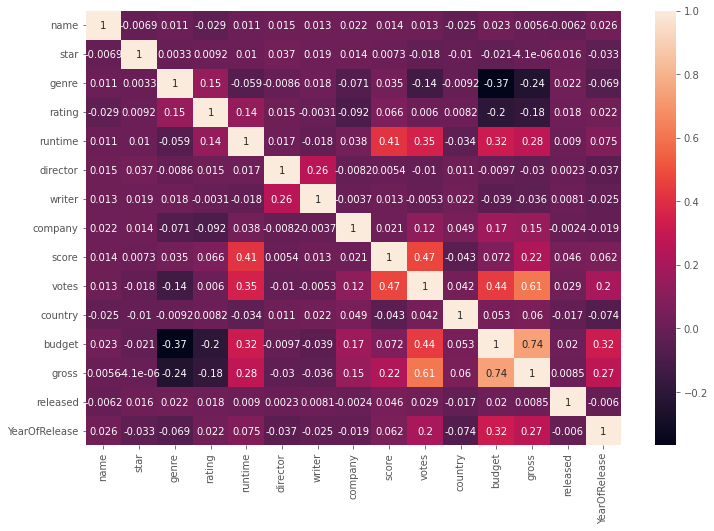

In [20]:
# Heatmap
sns.heatmap(corr_matrix, annot= True)
plt.show()

In [21]:
 #Insights
    #Top 3 correlations with Gross Revenue: Budget(0.74), Votes(0.61), Runtime(0.28)
    #Least correlation with Gross Revenue: Star